# Search and Download Sentinel 2 imagery using Sentinelsat API

Make sure all the libraries are installed below. Use conda if possible <br>
For Sentinelsat use <br>
<br>pip install sentinelsat 
<br>
<br>
At the conda prompt or at the cmd prompt

### Getting help
refer to the following links
<br>
sentinelsat git hub - https://github.com/sentinelsat/sentinelsat
<br>
sentinelsat API docs - https://sentinelsat.readthedocs.io/en/stable/api.html
<br>
<br>
virtually everything you will see here has been borrowed or adpated from here, I've just added a bit of folium and unzipping

### Import libraries

In [1]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

### Plot a boundary in WGS 84 EPSG code 4326 on a folium slipping map

In [2]:
m = folium.Map([50.6, -1.3], zoom_start=10)
boundsdata = r'D:\sentinelsat\bounds_IOW.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

### Connect to the API using a username and password - if you don't have these set one up on scihub

In [3]:
# connect to the API
user = 'user' ## change this!
password = 'password' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [4]:
# search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

POLYGON((-1.5905 50.7739,-1.5819 50.5371,-1.0038 50.5353,-1.0104 50.7757,-1.5905 50.7739))


### Search
Search for images that fall with the date range 25th Feb 2019 - 27 Feb 2019, we want sentinel 2 level2A and cloud cover of 0-20%

In [5]:
products = api.query(footprint,
                     date = ('20190225', '20190227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

In [6]:
print(len(products))

4


Show results in a table

In [7]:
api.to_geodataframe(products)

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
09a3b3c8-1223-4133-9f2d-dbb8efd9028b,S2B_MSIL2A_20190226T111049_N0211_R137_T30UWA_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T11:10:49.024Z, Instrument: MS...",2019-02-27 00:34:38.050,2019-02-26 11:10:49.024,2019-02-26 11:10:49.024,10316,137,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,541.45 MB,09a3b3c8-1223-4133-9f2d-dbb8efd9028b,"POLYGON ((-3.0002747 50.55229211062575, -1.450..."
29625327-bc7a-44c4-be47-4cfa2828a760,S2B_MSIL2A_20190226T111049_N0211_R137_T30UXA_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T11:10:49.024Z, Instrument: MS...",2019-02-27 00:34:30.848,2019-02-26 11:10:49.024,2019-02-26 11:10:49.024,10316,137,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,481.23 MB,29625327-bc7a-44c4-be47-4cfa2828a760,"POLYGON ((-1.5886536 50.54373917428845, -0.040..."
30b9e88b-94a7-45ec-9ceb-4fa8bf86be04,S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T11:10:49.024Z, Instrument: MS...",2019-02-27 00:35:03.682,2019-02-26 11:10:49.024,2019-02-26 11:10:49.024,10316,137,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1023.42 MB,30b9e88b-94a7-45ec-9ceb-4fa8bf86be04,"POLYGON ((-1.5611267 51.44235231685392, 0.0170..."
40128149-82fa-4d83-84a9-37155856ba6d,S2B_MSIL2A_20190226T111049_N0211_R137_T30UWB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T11:10:49.024Z, Instrument: MS...",2019-02-27 00:34:10.284,2019-02-26 11:10:49.024,2019-02-26 11:10:49.024,10316,137,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.02 GB,40128149-82fa-4d83-84a9-37155856ba6d,"POLYGON ((-3.0002747 51.45118220579359, -1.420..."


Plot the table as a GeoPandas dataframe, based on the uuid field

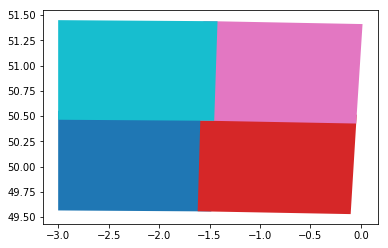

In [8]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

Label these polygons

09a3b3c8-1223-4133-9f2d-dbb8efd9028b    Annotation(-2.23334, 50.0551, '09a3b3c8-1223-4...
29625327-bc7a-44c4-be47-4cfa2828a760    Annotation(-0.836784, 50.0375, '29625327-bc7a-...
30b9e88b-94a7-45ec-9ceb-4fa8bf86be04    Annotation(-0.795352, 50.9358, '30b9e88b-94a7-...
40128149-82fa-4d83-84a9-37155856ba6d    Annotation(-2.21863, 50.954, '40128149-82fa-4d...
dtype: object

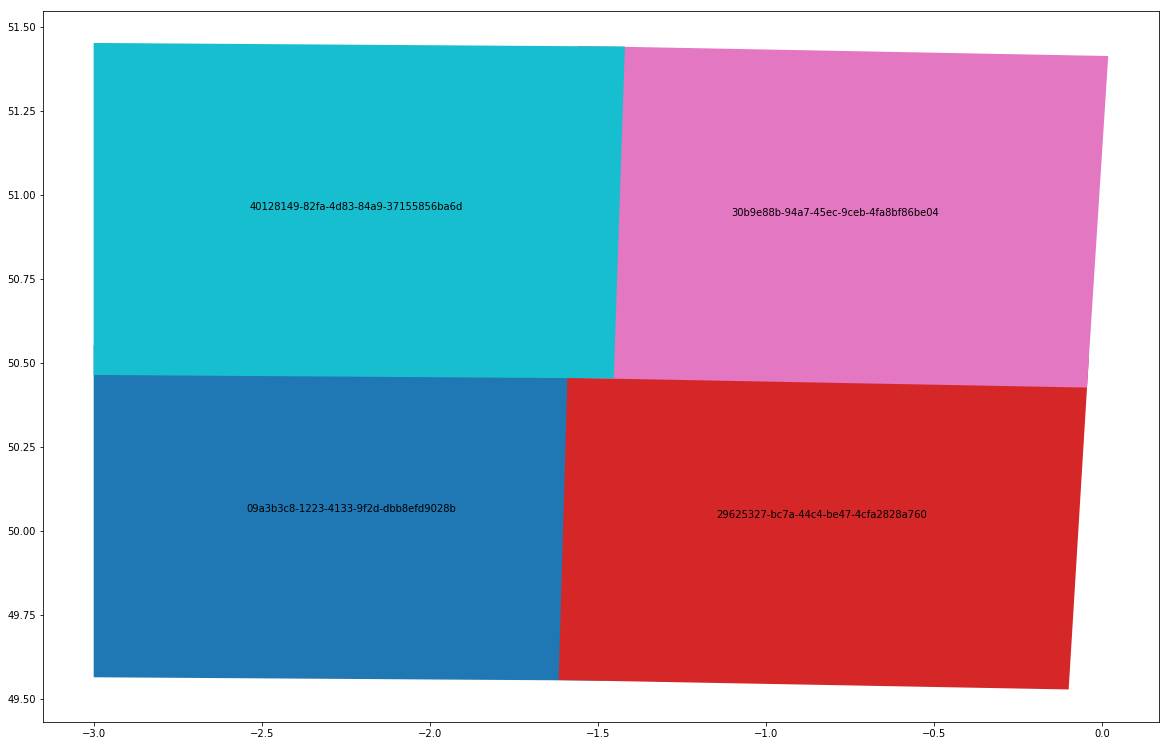

In [9]:
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

### Inspect vs our bounds
use geopandas to check which scene to download

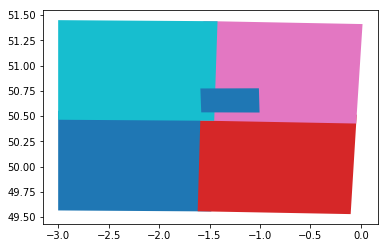

In [10]:
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

### Get the uuid and inspect produuct data

In [11]:
api.get_product_odata('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')

{'id': '30b9e88b-94a7-45ec-9ceb-4fa8bf86be04',
 'title': 'S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349',
 'size': 1073194791,
 'md5': 'BEDF8F60B10A030B54EF6710642A46C2',
 'date': datetime.datetime(2019, 2, 26, 11, 10, 49, 24000),
 'footprint': 'POLYGON((-1.5611267 51.44235231685392,0.017025008525814 51.41234265506691,-0.046142578 50.42629366061962,-1.5912781 50.45527216066188,-1.5611267 51.44235231685392))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 2, 27, 0, 47, 32, 672000),
 'Ingestion Date': datetime.datetime(2019, 2, 27, 0, 35, 3, 682000)}

## Download the data

In [12]:
api.download('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')

{'id': '30b9e88b-94a7-45ec-9ceb-4fa8bf86be04',
 'title': 'S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349',
 'size': 1073194791,
 'md5': 'BEDF8F60B10A030B54EF6710642A46C2',
 'date': datetime.datetime(2019, 2, 26, 11, 10, 49, 24000),
 'footprint': 'POLYGON((-1.5611267 51.44235231685392,0.017025008525814 51.41234265506691,-0.046142578 50.42629366061962,-1.5912781 50.45527216066188,-1.5611267 51.44235231685392))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 2, 27, 0, 47, 32, 672000),
 'Ingestion Date': datetime.datetime(2019, 2, 27, 0, 35, 3, 682000),
 'path': '.\\S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.zip',
 'downloaded_bytes': 0}

Get the path name so we can unzip

In [13]:
path_tozip = Out[12]['path'] ##notebook way - will not work in standalone script

Unzip using code found on stackoverflow
<br>
<br>
https://stackoverflow.com/questions/3451111/unzipping-files-in-python

In [14]:
import zipfile # https://stackoverflow.com/questions/3451111/unzipping-files-in-python
zip_ref = zipfile.ZipFile(path_tozip, 'r')
zip_ref.extractall(r'D:\sentinelsat')
zip_ref.close()

The data is now downloaded, and unzipped and waiting for you to work with it. There are plenty of things you can do with Satellite imagery for inspiration take a look at my website www.acgeospatial.co.uk

<br>
<br>
I offer training in Geospatial Python programming contact me info@acgeospatial.co.uk
